# AnyoneAI - Project II

# Making Estimations with our NBA dataset

In our first project, we learn how to create our own datasets by using a public API, Python and Pandas. We're now going to explore how to make predictive models for regression and classification tasks using ScikitLearn

The goals of this project are:
- Learn how to define a prediction task
- Selecting evaluation metrics and baseline models
- Perform feature engineering and standarization
- Training and using predictive models: Univariable and Multivariate Linear Regression, Classification
- Understand how Gradient Descent works by implementing a Linear Regressor in python

## Using Regression Models to Estimate players Salaries

A player's salary can be explained by a lot of factors: 

- Years in the league: NBA contracts are limited in price, players have caps on how much money they make depending on their years playing in the league
- Age: Highly correlated to the previous one, NBA players have a minimun age of 19 years
- Draft position: players out of USA universities are selected each year through a process called draft, in which each team selects a player in a predefined order for 2 rounds (meaning only 60 players are drafted each year). A rookie contract value depends on the draft position. (Undrafted players have to negotiate a salary independently)
- Performance in statistical categories: after the rookie contract, players can negotiate freely with teams, and usually statistical categories like points, rebounds and assists are extremely important.  
- Team: Even though there are limits to what all teams can expend in players salary, they all allocate their resources differently, and can be more willing to pay the penalties incurred by exceeding those limitations.
- Year in which the contract was signed: the mininum and maximum values of contracts possibles in the NBA changes depending on league revenue (television contracts, sponsorships, etc), so if the amount of money the teams make increases, players can negotiate bigger contracts.
- Intangibles: players can be valued also in things that are not easily translated to a statistic, good defensive players might not always have great stats but can be extremely important for a team, the same can be said about veteran players that help young ones to learn and are good locker-room guys.

But we're going to take a simplified approach, we'll try to use the data we already have to make the best estimator possible, and then we will analyze what went right and what could've gone wrong with our results.

### Analyzing our data

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import aux
%matplotlib inline

In [227]:
data = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/NBAPredictions/nba_players_processed_dataset.csv")
data

,PLAYER_ID,PLAYER_NAME,TEAM_NAME,COUNTRY,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,GAME_DATE,BIRTHDATE,HEIGHT,WEIGHT,AGE,POSITION
0,1630173,Precious Achiuwa,Raptors,Nigeria,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,NaN,1999-09-19,203,102.0,"Years=22,Months=8,Days=20",Forward
1,203500,Steven Adams,Grizzlies,New Zealand,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,2022-05-03,1993-07-20,210,120.0,"Years=28,Months=10,Days=21",Center
2,1628389,Bam Adebayo,Heat,USA,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,2022-05-04,1997-07-18,205,115.0,"Years=24,Months=10,Days=22",Center
3,1630583,Santi Aldama,Grizzlies,Spain,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,2022-05-03,2001-01-10,210,97.0,"Years=21,Months=4,Days=28",Forward
4,200746,LaMarcus Aldridge,Nets,USA,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,NaN,1985-07-19,210,113.0,"Years=36,Months=10,Days=24",Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1626153,Delon Wright,Hawks,USA,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316,NaN,1992-04-26,195,83.0,"Years=30,Months=1,Days=14",Guard
442,201152,Thaddeus Young,Raptors,USA,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000,NaN,1988-06-21,203,106.0,"Years=33,Months=11,Days=20",Forward
443,1629027,Trae Young,Hawks,USA,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471,NaN,1998-09-19,185,74.0,"Years=23,Months=8,Days=20",Guard
444,1630209,Omer Yurtseven,Heat,Turkey,0,-1,56,12.6,5.3,5.3,0.9,0.3,0.4,1489065,2022-05-04,1998-06-19,210,124.0,"Years=23,Months=11,Days=20",Center


# Exploratory Data Analysis

## Dataet Basics

Show the shape of the datasets and the its features

In [109]:
aux.data_basics(data)

The shape of the dataset is: (446, 20) 

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_NAME', 'COUNTRY', 'SEASON_EXP',
       'DRAFT_NUMBER', 'GP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK',
       'SALARY', 'GAME_DATE', 'BIRTHDATE', 'HEIGHT', 'WEIGHT', 'AGE',
       'POSITION'],
      dtype='object')


Data type of the features

In [110]:
aux.features_datatype(data)


The Data type of the feature PLAYER_ID is int64
The Data type of the feature PLAYER_NAME is object
The Data type of the feature TEAM_NAME is object
The Data type of the feature COUNTRY is object
The Data type of the feature SEASON_EXP is int64
The Data type of the feature DRAFT_NUMBER is int64
The Data type of the feature GP is int64
The Data type of the feature MIN is float64
The Data type of the feature PTS is float64
The Data type of the feature REB is float64
The Data type of the feature AST is float64
The Data type of the feature STL is float64
The Data type of the feature BLK is float64
The Data type of the feature SALARY is int64
The Data type of the feature GAME_DATE is object
The Data type of the feature BIRTHDATE is object
The Data type of the feature HEIGHT is int64
The Data type of the feature WEIGHT is float64
The Data type of the feature AGE is object
The Data type of the feature POSITION is object


There are some feature that will no be useful for future analysis and some others that need a Data type Tranformation

In [228]:
#Elimination
del data["PLAYER_ID"]
del data["BIRTHDATE"]
del data["GAME_DATE"]

#Tranforming AGE into a single Integer value
for i, column in data.iterrows():
    test = data.loc[i, "AGE"]
    separator = ',Months'
    head, sep, tail = test.partition(separator)
    waste, sep, age = head.partition("=")
    data.loc[i, "AGE"] = int(age)

print("The shape of the dataset is:",data.shape)

The shape of the dataset is: (446, 17)


Checking of Missing Values

In [114]:
aux.missing_values(data)

Percentage of missing values
PLAYER_NAME     0.0
AST             0.0
AGE             0.0
WEIGHT          0.0
HEIGHT          0.0
SALARY          0.0
BLK             0.0
STL             0.0
REB             0.0
TEAM_NAME       0.0
PTS             0.0
MIN             0.0
GP              0.0
DRAFT_NUMBER    0.0
SEASON_EXP      0.0
COUNTRY         0.0
POSITION        0.0
dtype: float64


## Descriptive Statistics

**Measures of Central Tendency**

The measures of central tendency show the central or middle values of datasets. There are several definitions of what’s considered to be the center of a dataset. In this tutorial, you’ll learn how to identify and calculate these measures of central tendency:

- Mean
- Weighted mean
- Median
- Mode

In [100]:
import math
import statistics
import scipy.stats
import visualizations  

### Mean

The sample mean, also called the sample arithmetic mean or simply the average, is the arithmetic average of all the items in a dataset. The mean of a dataset 𝑥 is mathematically expressed as Σᵢ𝑥ᵢ/𝑛, where 𝑖 = 1, 2, …, 𝑛. In other words, it’s the sum of all the elements 𝑥ᵢ divided by the number of items in the dataset 𝑥.

In [176]:
aux.mean(data)

The mean of SEASON_EXP is 4.72
The mean of DRAFT_NUMBER is 17.57
The mean of GP is 336.65
The mean of MIN is 22.44
The mean of PTS is 10.13
The mean of REB is 4.07
The mean of AST is 2.17
The mean of STL is 0.73
The mean of BLK is 0.47
The mean of SALARY is 8728325.71
The mean of HEIGHT is 198.58
The mean of WEIGHT is 97.74
The mean of AGE is 26.22


### Weighted Mean

The weighted mean is a generalization of the arithmetic mean that enables you to define the relative contribution of each data point to the result.

You define one weight 𝑤ᵢ for each data point 𝑥ᵢ of the dataset 𝑥, where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in 𝑥. Then, you multiply each data point with the corresponding weight, sum all the products, and divide the obtained sum with the sum of weights: Σᵢ(𝑤ᵢ𝑥ᵢ) / Σᵢ𝑤ᵢ.

This is a more detailed analysis, it is commonly use on feautures were you have a reduce amount of values. On our analysis it could be done with the "Seasons Experience", just to put an example.

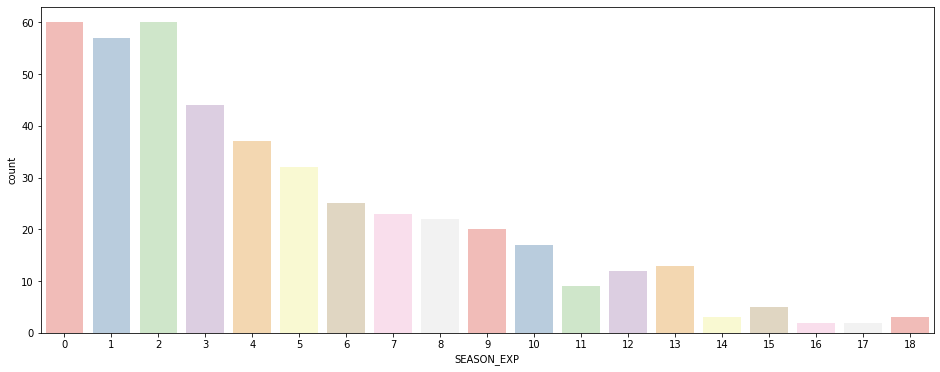

In [200]:
visualizations.value_counts(data, "SEASON_EXP")

In [203]:
feature_vals, weights = aux.feature_vals_and_weights(data, "SEASON_EXP")

The rounded percentage of the value 0 is of 13.450000000000001 %
The rounded percentage of the value 2 is of 13.450000000000001 %
The rounded percentage of the value 1 is of 12.78 %
The rounded percentage of the value 3 is of 9.87 %
The rounded percentage of the value 4 is of 8.3 %
The rounded percentage of the value 5 is of 7.17 %
The rounded percentage of the value 6 is of 5.609999999999999 %
The rounded percentage of the value 7 is of 5.16 %
The rounded percentage of the value 8 is of 4.93 %
The rounded percentage of the value 9 is of 4.4799999999999995 %
The rounded percentage of the value 10 is of 3.81 %
The rounded percentage of the value 13 is of 2.91 %
The rounded percentage of the value 12 is of 2.69 %
The rounded percentage of the value 11 is of 2.02 %
The rounded percentage of the value 15 is of 1.1199999999999999 %
The rounded percentage of the value 18 is of 0.67 %
The rounded percentage of the value 14 is of 0.67 %
The rounded percentage of the value 17 is of 0.4499999999

In [204]:
w_mean = aux.weighted_mean(feature_vals, weights)
print("The Weighted Mean of the Seasons Experience is of", w_mean)

The Weighted Mean of the Seasons Experience is of 4.715246636771301


### Median

The sample median is the middle element of a sorted dataset. The dataset can be sorted in increasing or decreasing order. If the number of elements 𝑛 of the dataset is odd, then the median is the value at the middle position: 0.5(𝑛 + 1). If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions 0.5𝑛 and 0.5𝑛 + 1.

In [208]:
aux.median(data)

The meadian of SEASON_EXP is 4.0
The meadian of DRAFT_NUMBER is 13.5
The meadian of GP is 241.5
The meadian of MIN is 22.65
The meadian of PTS is 9.0
The meadian of REB is 3.6
The meadian of AST is 1.6
The meadian of STL is 0.7
The meadian of BLK is 0.3
The meadian of SALARY is 4405080.0
The meadian of HEIGHT is 198.0
The meadian of WEIGHT is 97.0
The meadian of AGE is 25.0


### Mode

The sample mode is the value in the dataset that occurs most frequently. If there isn’t a single such value, then the set is multimodal since it has multiple modal values. 

In [212]:
aux.mode(data)

The mode of SEASON_EXP is 0
The mode of DRAFT_NUMBER is -1
The mode of GP is 134
The mode of MIN is 20.9
The mode of PTS is 7.6
The mode of REB is 3.0
The mode of AST is 1.0
The mode of STL is 0.7
The mode of BLK is 0.2
The mode of SALARY is 1517981
The mode of HEIGHT is 195
The mode of WEIGHT is 97.0
The mode of AGE is 24


## Measures of Variability

The measures of central tendency aren’t sufficient to describe data. You’ll also need the measures of variability that quantify the spread of data points. In this section, you’ll learn how to identify and calculate the following variability measures:

- Variance
- Standard deviation
- Skewness
- Percentiles

### Variance

The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. You can express the sample variance of the dataset 𝑥 with 𝑛 elements mathematically as 𝑠² = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥.

Now you can intuitively understand that if this value is less, it means that on average, every score has low difference with the mean. Hence, we can conclude that all the scores are approximately close to the mean. If however the variance is high, we know that there are a lot of extreme values, and the mean is a poor estimate of the actual scores.

In [215]:
aux.variance(data)

The variance of SEASON_EXP is 17.33221645588754
The variance of DRAFT_NUMBER is 260.28552426059355
The variance of GP is 81605.15062226029
The variance of MIN is 59.1554876807578
The variance of PTS is 29.147073713911425
The variance of REB is 4.927323021111502
The variance of AST is 2.9515310626291127
The variance of STL is 0.13488103995566084
The variance of BLK is 0.16683266992492565
The variance of SALARY is 99775469888807.4
The variance of HEIGHT is 68.432428074772
The variance of WEIGHT is 124.68489948102989
The variance of AGE is 19.871965536353102


### Standard Deviation

The sample standard deviation is another measure of data spread. It’s connected to the sample variance, is the positive square root of it. The standard deviation is often more convenient than the variance because it has the same unit as the data points and you will be dealing with smaller values.

In [218]:
aux.std_deviation(data)

The Standard Deviation of SEASON_EXP is 4.163197864128913
The Standard Deviation of DRAFT_NUMBER is 16.133366798675148
The Standard Deviation of GP is 285.6661523916691
The Standard Deviation of MIN is 7.691260474119818
The Standard Deviation of PTS is 5.398802988988525
The Standard Deviation of REB is 2.2197574239343143
The Standard Deviation of AST is 1.7180020554787216
The Standard Deviation of STL is 0.3672615416234878
The Standard Deviation of BLK is 0.40845155150265455
The Standard Deviation of SALARY is 9988767.185634442
The Standard Deviation of HEIGHT is 8.272389502119204
The Standard Deviation of WEIGHT is 11.166239272066038
The Standard Deviation of AGE is 4.457798283497483


As you can observe, these values are the sqaured root values of its own variance previouly calculated

### Skewness

The sample skewness measures the asymmetry of a data sample.

Usually, negative skewness values indicate that there’s a dominant tail on the left side. Positive skewness values correspond to a longer or fatter tail on the right side. If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.

In [220]:
aux.skewness(data)

The Skewness of SEASON_EXP is 0.9466932818532096
The Skewness of DRAFT_NUMBER is 0.5883654122668198
The Skewness of GP is 1.0498936039787734
The Skewness of MIN is -0.3833019388441366
The Skewness of PTS is 0.8013038033994712
The Skewness of REB is 1.2027486859914376
The Skewness of AST is 1.5895385478807496
The Skewness of STL is 0.6535360035723834
The Skewness of BLK is 1.8762969413855932
The Skewness of SALARY is 1.7211285799568365
The Skewness of HEIGHT is -0.0634886116410146
The Skewness of WEIGHT is 0.42658740523119154
The Skewness of AGE is 0.538975937608559


### Percentiles

The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. If there are two such elements in the dataset, then the sample 𝑝 percentile is their arithmetic mean. Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

- The first quartile is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
- The second quartile is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
- The third quartile is the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.


In [230]:
aux.percentiles(data)

The percentiles of SEASON_EXP is [1. 4. 7.]
The percentiles of DRAFT_NUMBER is [ 3.  13.5 30. ]
The percentiles of GP is [115.  241.5 511. ]
The percentiles of MIN is [17.35 22.65 28.7 ]
The percentiles of PTS is [ 6.2  9.  13.4]
The percentiles of REB is [2.5 3.6 5.1]
The percentiles of AST is [1.  1.6 2.9]
The percentiles of STL is [0.5 0.7 0.9]
The percentiles of BLK is [0.2 0.3 0.6]
The percentiles of SALARY is [ 2000000.  4405080. 11903832.]
The percentiles of HEIGHT is [193. 198. 205.]
The percentiles of WEIGHT is [ 90.  97. 105.]
The percentiles of AGE is [23.0 25.0 29.0]


It is very didactic to code my own functions to evaluate this metrics, also useful for some cases I just want to see some in specific.
But, let´s see a way of doing it with a pandas method way faster and easier...

In [232]:
data.describe()

,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,HEIGHT,WEIGHT
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,4.460000e+02,446.00000,446.000000
mean,4.715247,17.573991,336.645740,22.438117,10.126457,4.074888,2.165247,0.732735,0.468610,8.728326e+06,198.58296,97.735426
std,4.163198,16.133367,285.666152,7.691260,5.398803,2.219757,1.718002,0.367262,0.408452,9.988767e+06,8.27239,11.166239
min,0.000000,-1.000000,2.000000,2.800000,1.000000,0.500000,0.000000,0.000000,0.000000,5.318000e+03,175.00000,72.000000
25%,1.000000,3.000000,115.000000,17.350000,6.200000,2.500000,1.000000,0.500000,0.200000,2.000000e+06,193.00000,90.000000
50%,4.000000,13.500000,241.500000,22.650000,9.000000,3.600000,1.600000,0.700000,0.300000,4.405080e+06,198.00000,97.000000
75%,7.000000,30.000000,511.000000,28.700000,13.400000,5.100000,2.900000,0.900000,0.600000,1.190383e+07,205.00000,105.000000
max,18.000000,60.000000,1366.000000,38.200000,27.200000,13.300000,9.500000,2.100000,2.300000,4.578097e+07,220.00000,131.000000


There are missing some metrics, but for most of the cases thi will do the work

## Measures of Correlation Between Pairs of Data

You’ll often need to examine the relationship between the corresponding elements of two variables in a dataset. Say there are two variables, 𝑥 and 𝑦, with an equal number of elements, 𝑛. Let 𝑥₁ from 𝑥 correspond to 𝑦₁ from 𝑦, 𝑥₂ from 𝑥 to 𝑦₂ from 𝑦, and so on. You can then say that there are 𝑛 pairs of corresponding elements: (𝑥₁, 𝑦₁), (𝑥₂, 𝑦₂), and so on.

You’ll see the following measures of correlation between pairs of data:

- Positive correlation exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
- Negative correlation exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
- Weak or no correlation exists if there is no such apparent relationship.

The two statistics that measure the correlation between datasets are **covariance** and the **correlation coefficient**.

In [229]:
import importlib
importlib.reload(aux)

import importlib
importlib.reload(visualizations)

<module 'visualizations' from '/Users/carolinapeinado/Desktop/Santi/NBAPredictions/visualizations.py'>

### Correlatino between Salary and different features

1.1. Plot all players statistics ("PTS", "REB", "AST","STL","BLK") against salary

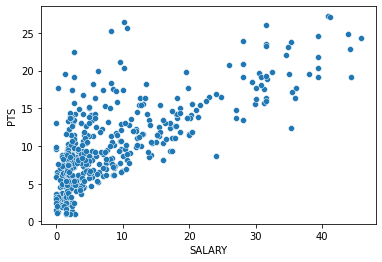

In [99]:
visualizations.correlation_scatterplot(data=data, x=data['SALARY']/1000000, y=data['PTS'])

In [ ]:
visualizations.correlation_scatterplot(data=data, x=data['SALARY']/1000000, y=data['PTS'])

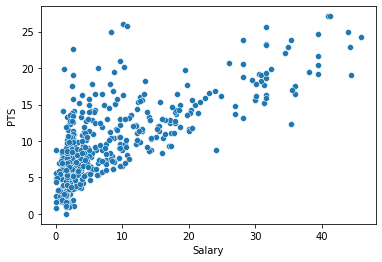

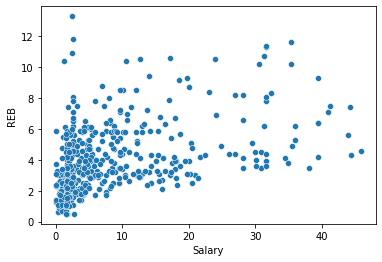

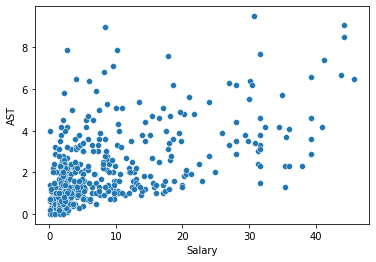

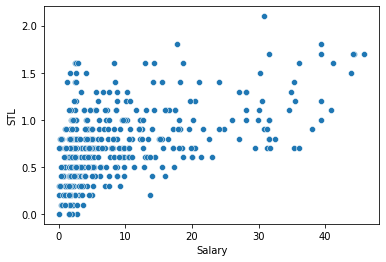

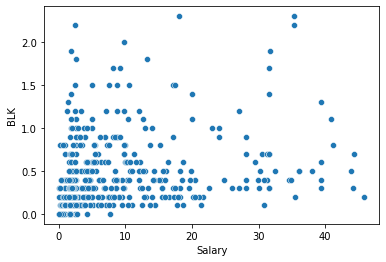

In [4]:
#PTS
sns.scatterplot(data=data, x=data['Salary']/1000000, y=data['PTS'])
plt.show()
#REB
sns.scatterplot(data=data, x=data['Salary']/1000000, y=data['REB'])
plt.show()
#AST
sns.scatterplot(data=data, x=data['Salary']/1000000, y=data['AST'])
plt.show()
#STL
sns.scatterplot(data=data, x=data['Salary']/1000000, y=data['STL'])
plt.show()
#BLK
sns.scatterplot(data=data, x=data['Salary']/1000000, y=data['BLK'])
plt.show()

1.2. What can we say about these distributions?

In [ ]:
"""Let's start by clarifying that the 5 charts have players who are earning an average or low contract, and are leading in the different statistics. 
This is due to three things, mainly to the rookies, who as we have already seen, earn contracts predetermined by the NBA for the first 4 
years of their career regardless of their performance, then, due to the "revelation" players..., what do I mean by this?. Players 
from other leagues who came to play in the NBA as promises and are doing well, or even players who came from bad seasons (that's why they probably
have low contracts) and maybe this year they started to play a lot better for different reasons, such as having found a technician who makes him 
shine more, self-motivation of aiming to stand out, etc. The last reason, I believe, and the charts support this, is simply because the players 
who highlight on the attack part of a team are the ones better pay, and the ones that highlight on the defense part of a team are not recognize as 
much as the offensive players. Having said this, we could clearly see that the stat which is most "appreciate" at the moment of negotiating a contract 
is the points you make. If you see the chart of PTS vs SALARY you can see the linear relationship between this two variables. I think this is a common 
pattern between different sports, if you think of football, the strikers are the ones who earn the most money and are the most expensive players, goals, 
or points in this case, is what make you win matches... Also, in general the players who make a lot of points tend to be the most talented ones and are 
the ones who make the viewer turn on the TV to see the game or make the fan pay the game ticket for the game. 
Nevertheless, without considerating the BLK vs SALARY chart, we can see a linear relationship between the other stats and the salary,
none of these ones are as linear as the PTS vs SALARY, but linear at the end of the story. So, to conclude, I think that the BLK stat is the most
underrated one by far, and that the others have certain logic on its distribution but obviously the players who most earn are the ones who score
the points, as it is in most of the sports."""

### Splitting the Dataset

1.3. Split the dataset into train and testing sets. Use the Sklearn function for train/test splitting. Make sure to set the random state for reproducibility.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data["PTS"]
y = data["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7 ,random_state = 32)

### Baseline Model and Evaluation Metric

In every project, we need a baseline model that implements a very simple algorithm or heuristic so we can compare our results with it. 
In this case, we could create a function that always returns the average player salary, evaluate that, and then compare the result with our modeling to see if we are improving. 

We need an evaluation metric to see how well our models fit the data. For this project we will use [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) as our regression evaluation metric, because it is a really simple metric to interpret. A lower value means the model performs better. 

For this particular problem, we will always round the value, as we don't need decimals for this task.

1.4. Create a Baseline model class that implements  fit() and predict() methods. As this model will not consider any other variable, the fit method should only receive a list of all players salaries. The predict method should receive and iterable and return a numpy array with the same length but every element should have the same value (the average salary)

In [8]:
class BaselineModel():
    def __init__(self):
      self.w1 = 0
      self.mean_lst = []

    def fit(self, y_train):
        self.w0 = np.mean(y_train)
    
    def predict(self, X):
        for i in range(len(X)):
          self.mean_lst.append(self.w0)

        mean_array = np.array(self.mean_lst)
        return mean_array

1.5. Evaluate the performance of our BaselineModel on the test set using mean_absolute_error from Sklearn (round the result)

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
base_model = BaselineModel()
base_model.fit(y_train)
y_pred = base_model.predict(X_test)
MAE_BM = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error is approximately",round(MAE_BM))

The Mean Absolute Error is approximately 7974093


### Regression with a single variable

You're now going to start modeling data. We will start with a really simple approach, selecting just one variable, and doing a regression to see if we improve upon our baseline.


1.6. Select the variable you think would provide the best fit. Perform feature scaling on this variable using a Sklearn scaler.

In [11]:
X_test = np.array(X_test).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)

In [12]:
from sklearn.preprocessing import StandardScaler

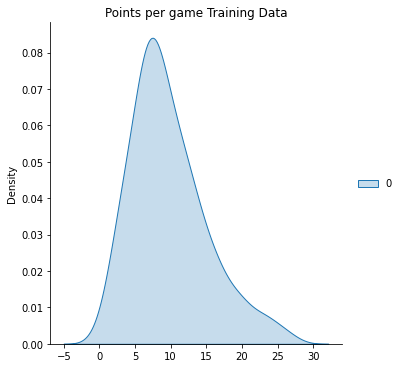

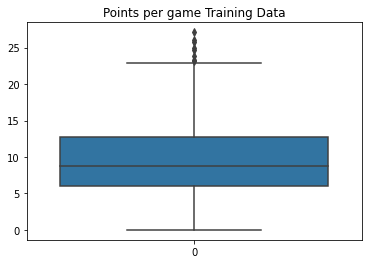

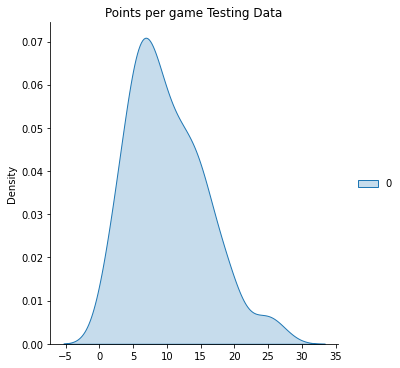

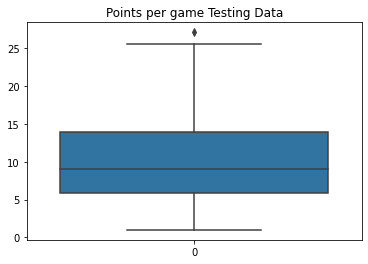

In [13]:
"""As I mentioned before on point 1.2, I believed that the feature which most influence on the Players´s 
salary, is his points per game stat. So, we are going to start fitting the model with this feature. 
We have two different options to scale this feature, each one of it has it´s particularities. As a basic
rule on deciding if normalize or standarize the feature, we know that depending the "look" of it on the
distribution plot we should use one method or another. If the distribution is not Gaussian (bell curve), 
it would fit more using the normalization method, otherwise the standarization method. Also, the standarization
methos works better with outliers. """

sns.displot(data=X_train, kind="kde", fill=True).set(title="Points per game Training Data")
plt.show()

sns.boxplot(data=X_train).set(title="Points per game Training Data")
plt.show()

sns.displot(data=X_test, kind="kde", fill=True).set(title="Points per game Testing Data")
plt.show()

sns.boxplot(data=X_test).set(title="Points per game Testing Data")
plt.show()

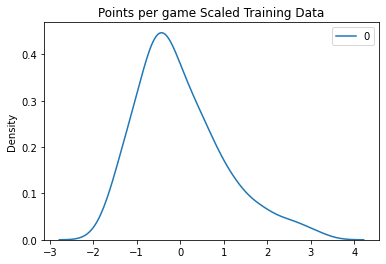

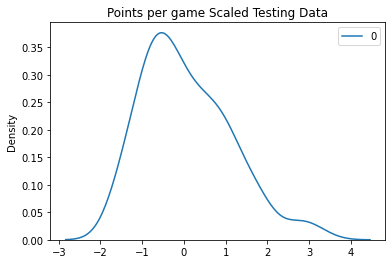

In [14]:
"""As both distributions are sort of Gaussian and they have some outliers (mainly on the training data),
I am going to standarize the Points feature... As Pablo told us on the daily lecture, we should choose the 
best option considerating all the features, so we can generalize the problem. """

scaler = StandardScaler()

# train dataset scaling 
X_train = scaler.fit_transform(X_train)
sns.kdeplot(data= X_train, color='blue').set_title('Points per game Scaled Training Data')
plt.show()

# test dataset scaling
X_test = scaler.transform(X_test)
sns.kdeplot(data = X_test, color='blue').set_title('Points per game Scaled Testing Data')
plt.show()

1.7. Train a model with [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) from Sklearn using the default parameters. Evaluate the model's performance on the test set using the selected metric.

In [15]:
from sklearn.linear_model import SGDRegressor

In [16]:
#Let´s train the model and predict some salaries
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error is approximately",round(MAE))

The Mean Absolute Error is approximately 5343279


1.8. Read the Sklearn documentation, and write a function that tries different configurations for the hyperparameters for training: epochs, learning rate and alpha. For each combination of parameters, evaluate the trained algorithm on the test set, then save the results of each hyperparameter combination, finally select the one that has the best MAE (meaning the lowest number) and print the combination and the MAE.

In [17]:
def search_best_hyperparameters(max_iter, eta0):
    sgdr1 = SGDRegressor(max_iter = max_iter, eta0 = eta0)
    sgdr1.fit(X_train, y_train)
    y_pred = sgdr1.predict(X_test)
    MAE_hyp = mean_absolute_error(y_test, y_pred)
    return round(MAE_hyp)

In [18]:
# Example list of hyperparameters values
max_iter_0 = [10000, 100000, 1000000]
eta0_0 = [0.0001, 0.001, 0.01, 0.1]
best_iter = 0
best_eta0 = 0
best_result = 10000000 #I choose a random number very big 

for i in range(len(max_iter_0)):
  for j in range(len(eta0_0)):
    result = search_best_hyperparameters(max_iter_0[i], eta0_0[j])
    if result <= best_result:
      best_result = result
      best_iter = max_iter_0[i]
      best_eta0 = eta0_0[j] 
    print("The MAE error for epoch value of",max_iter_0[i],"and learning rate value of",eta0_0[j],"is",result)

print("The best result is of a MAE of",best_result,"with",best_iter,"iterations and a learning rate of",best_eta0)

The MAE error for epoch value of 10000 and learning rate value of 0.0001 is 5343130
The MAE error for epoch value of 10000 and learning rate value of 0.001 is 5343016
The MAE error for epoch value of 10000 and learning rate value of 0.01 is 5341819
The MAE error for epoch value of 10000 and learning rate value of 0.1 is 5343994
The MAE error for epoch value of 100000 and learning rate value of 0.0001 is 5343170
The MAE error for epoch value of 100000 and learning rate value of 0.001 is 5343092
The MAE error for epoch value of 100000 and learning rate value of 0.01 is 5342352
The MAE error for epoch value of 100000 and learning rate value of 0.1 is 5350280
The MAE error for epoch value of 1000000 and learning rate value of 0.0001 is 5343139
The MAE error for epoch value of 1000000 and learning rate value of 0.001 is 5343294
The MAE error for epoch value of 1000000 and learning rate value of 0.01 is 5342234
The MAE error for epoch value of 1000000 and learning rate value of 0.1 is 535083

1.9. Compare the results of the baseline, the SGDRegressor with default parameters and the one with the best combination of hyperparameters you could find. (replace variables with the ones you used)

In [19]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {round(MAE_BM)}")
print(f"Default SGDRegressor: {round(MAE)}")
print(f"Best SGDRegressor: {round(best_result)}")

Mean Absolute Error for each model:
Baseline: 7974093
Default SGDRegressor: 5343279
Best SGDRegressor: 5341819


### Multivariate Linear Regression

To improve our model, we will add more features to it. We will have to do some processing to our dataset to be able to use the data.
We'll start with the following variables:

- Points
- Rebounds
- Assists
- Blocks
- Experience
- Position
- Draft Number


1.10. Create a copy of the dataset generated in the first project that only has the following columns (and player id as an index):

["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "TEAM_NAME", "SALARY"]

In [20]:
data_filttered = nba_dataset.copy()

In [21]:
del data_filttered["PLAYER_NAME"]
del data_filttered["HEIGHT"]
del data_filttered["WEIGHT"]
del data_filttered["COUNTRY"]
del data_filttered["BIRTHDATE"]
del data_filttered["GP"]
del data_filttered["MIN"]
del data_filttered["STL"]
del data_filttered["GAME_DATE"]
del data_filttered["AGE"]
data_filttered.set_index('PERSON_ID', inplace = True)
data_filttered

,TEAM_NAME,POSITION,SEASON_EXP,DRAFT_NUMBER,PTS,REB,AST,BLK,Salary
PERSON_ID,,,,,,,,,
1630173,Raptors,Forward,1,20,6.5,5.1,0.8,0.5,2711280
203500,Grizzlies,Center,8,12,9.3,7.9,1.4,0.9,17073171
1628389,Heat,Center,4,14,13.2,8.2,3.5,0.9,28103550
1630583,Grizzlies,Forward,0,30,3.3,2.4,0.5,0.3,1994520
200746,Nets,Center,15,2,19.1,8.1,1.9,1.1,2641691
...,...,...,...,...,...,...,...,...,...
201152,Raptors,Forward,14,12,12.9,5.9,1.8,0.4,14190000
1629027,Hawks,Guard,3,5,25.0,3.9,9.0,0.2,8326471
1630209,Heat,Center,0,Undrafted,6.0,5.7,1.0,0.4,1489065


#### Feature Engineering

In [ ]:
#First I should delete the ones missing the team names, and the ones missing the draft number put them -1 (future assigment for the Undrafted).
data_filttered = data_filttered[data_filttered['TEAM_NAME'].notna()]
data_filttered['DRAFT_NUMBER'] = data_filttered['DRAFT_NUMBER'].fillna(-1)

In [23]:
data_filttered.isna().sum()

TEAM_NAME       0
POSITION        0
SEASON_EXP      0
DRAFT_NUMBER    0
PTS             0
REB             0
AST             0
BLK             0
Salary          0
dtype: int64

1.11. Binning the DRAFT_NUMBER feature. Draft position directly impacts salaries during the first few years, but second round players and undrafted players don't have guaranteed contracts. So we're gonna divide the bins like this: 

       - 1 to 15: firstround_lottery
       - 15 to 30: firstround_non_lottery
       - 30 to 60: second_round
       - Undrafted: undrafted
       
Create a new column named DRAFT using these 4 categories. Drop the draft number column.

In [ ]:
#I have to convert "DRAFT_NUMBER" column into a numerical value to both datasets.
for index, columns in data_filttered.iterrows():
  if columns["DRAFT_NUMBER"] == "Undrafted":
    data_filttered.loc[index, "DRAFT_NUMBER"] = -1

data_filttered["DRAFT_NUMBER"] = data_filttered["DRAFT_NUMBER"].astype(int)

#OBS: The group (-2,0) are the "Undrafted".
bins = pd.IntervalIndex.from_tuples([(-2,0),(0,15),(15,30),(30,60)])
drafts_dists = pd.cut(data_filttered["DRAFT_NUMBER"], bins)
data_filttered["DRAFTS"] = drafts_dists
del data_filttered["DRAFT_NUMBER"]

In [25]:
data_filttered

,TEAM_NAME,POSITION,SEASON_EXP,PTS,REB,AST,BLK,Salary,DRAFTS
PERSON_ID,,,,,,,,,
1630173,Raptors,Forward,1,6.5,5.1,0.8,0.5,2711280,"(15, 30]"
203500,Grizzlies,Center,8,9.3,7.9,1.4,0.9,17073171,"(0, 15]"
1628389,Heat,Center,4,13.2,8.2,3.5,0.9,28103550,"(0, 15]"
1630583,Grizzlies,Forward,0,3.3,2.4,0.5,0.3,1994520,"(15, 30]"
200746,Nets,Center,15,19.1,8.1,1.9,1.1,2641691,"(0, 15]"
...,...,...,...,...,...,...,...,...,...
201152,Raptors,Forward,14,12.9,5.9,1.8,0.4,14190000,"(0, 15]"
1629027,Hawks,Guard,3,25.0,3.9,9.0,0.2,8326471,"(0, 15]"
1630209,Heat,Center,0,6.0,5.7,1.0,0.4,1489065,"(-2, 0]"


1.12. Encode the categorical features: DRAFT, POSITION and TEAM_NAME

In [26]:
data_encode_draft = pd.get_dummies(data_filttered["DRAFTS"])
data_encode_position = pd.get_dummies(data_filttered["POSITION"])
data_encode_team = pd.get_dummies(data_filttered["TEAM_NAME"])
data_filttered = data_filttered.join(data_encode_draft)
data_filttered = data_filttered.join(data_encode_position)
data_filttered = data_filttered.join(data_encode_team)

In [27]:
data_filttered

,TEAM_NAME,POSITION,SEASON_EXP,PTS,REB,AST,BLK,Salary,DRAFTS,"(-2, 0]",...,Pistons,Raptors,Rockets,Spurs,Suns,Thunder,Timberwolves,Trail Blazers,Warriors,Wizards
PERSON_ID,,,,,,,,,,,,,,,,,,,,,
1630173,Raptors,Forward,1,6.5,5.1,0.8,0.5,2711280,"(15, 30]",0,...,0,1,0,0,0,0,0,0,0,0
203500,Grizzlies,Center,8,9.3,7.9,1.4,0.9,17073171,"(0, 15]",0,...,0,0,0,0,0,0,0,0,0,0
1628389,Heat,Center,4,13.2,8.2,3.5,0.9,28103550,"(0, 15]",0,...,0,0,0,0,0,0,0,0,0,0
1630583,Grizzlies,Forward,0,3.3,2.4,0.5,0.3,1994520,"(15, 30]",0,...,0,0,0,0,0,0,0,0,0,0
200746,Nets,Center,15,19.1,8.1,1.9,1.1,2641691,"(0, 15]",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201152,Raptors,Forward,14,12.9,5.9,1.8,0.4,14190000,"(0, 15]",0,...,0,1,0,0,0,0,0,0,0,0
1629027,Hawks,Guard,3,25.0,3.9,9.0,0.2,8326471,"(0, 15]",0,...,0,0,0,0,0,0,0,0,0,0
1630209,Heat,Center,0,6.0,5.7,1.0,0.4,1489065,"(-2, 0]",1,...,0,0,0,0,0,0,0,0,0,0


#### Modeling

1.13. Split the dataset into train and test

In [28]:
data_filttered_copy = data_filttered

In [29]:
X_0 = data_filttered_copy.drop(['Salary'], axis=1)
y_0 = data_filttered_copy["Salary"]
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, train_size= 0.7 ,random_state = 27)

1.14. Perform feature scaling in all the numerical features ("PTS", "REB", "AST", "BLK", "SEASON_EXP") except for draft number

In [30]:
# train dataset scaling 
scaler = StandardScaler()
features_to_scale = ['PTS', 'REB', 'AST', 'BLK', 'SEASON_EXP']
X_0_train[features_to_scale] = scaler.fit_transform(X_0_train[features_to_scale])

# test dataset scaling
X_0_test[features_to_scale] = scaler.transform(X_0_test[features_to_scale])

In [31]:
del X_0_train['TEAM_NAME']
del X_0_train['DRAFTS']
del X_0_train['POSITION']

del X_0_test['TEAM_NAME']
del X_0_test['DRAFTS']
del X_0_test['POSITION']

1.15. Write a function to train a SGDRegressor model with the new dataset, trying different hyperparameters, and selecting the one that performs the best.

In [32]:
import warnings

In [33]:
#Let´s train the model and predict some salaries
def search_best_hyperparameters_multi(max_iter, eta0):
  sgd_1 = SGDRegressor(max_iter = max_iter_0[i], eta0 = eta0_0[j])
  sgd_1.fit(X_0_train, y_0_train)
  y_0_pred = sgd_1.predict(X_0_test)
  MAE_multi = mean_absolute_error(y_0_test, y_0_pred)
  warnings.filterwarnings('ignore')
  return round(MAE_multi)

In [34]:
# Example list of hyperparameters values
max_iter_0 = [10000, 100000, 1000000]
eta0_0 = [0.0001, 0.001, 0.01, 0.1]
best_iter = max_iter_0[0]
best_eta0 = eta0_0[0]
best_result = 10000000000000  #I choose a random number very big 

for i in range(len(max_iter_0)):
  for j in range(len(eta0_0)):
    result = search_best_hyperparameters_multi(max_iter_0[i], eta0_0[j])
    if result <= best_result:
      best_result = result
      best_iter = max_iter_0[i]
      best_eta0 = eta0_0[j] 
    print("The MAE error for epoch value of",max_iter_0[i],"and learning rate value of",eta0_0[j],"is",result)
    
print("The best result is of a MAE of",best_result,"with",best_iter,"iterations and a learning rate of",best_eta0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'str']. An error will be raised in 1.2.
  FutureWarning,


The MAE error for epoch value of 10000 and learning rate value of 0.0001 is 4603259
The MAE error for epoch value of 10000 and learning rate value of 0.001 is 4948242
The MAE error for epoch value of 10000 and learning rate value of 0.01 is 4786823
The MAE error for epoch value of 10000 and learning rate value of 0.1 is 4997599
The MAE error for epoch value of 100000 and learning rate value of 0.0001 is 4885411
The MAE error for epoch value of 100000 and learning rate value of 0.001 is 4956942
The MAE error for epoch value of 100000 and learning rate value of 0.01 is 4822040
The MAE error for epoch value of 100000 and learning rate value of 0.1 is 5336061
The MAE error for epoch value of 1000000 and learning rate value of 0.0001 is 5008865
The MAE error for epoch value of 1000000 and learning rate value of 0.001 is 4951195
The MAE error for epoch value of 1000000 and learning rate value of 0.01 is 4781360
The MAE error for epoch value of 1000000 and learning rate value of 0.1 is 522834

1.16. How did the model performed compared to our univariate models? 

In [ ]:
""""I was expecting a much better result, as we can see there was not much of a difference 
on the MAE calculation. It seems that more features do not necesary means that the model is
going to predict with more accuracy, unlike of what I thought...."""

### DecisionTreeRegressor

It is possible that this problem might not be easily resolvable by a linear model, or that there could be better types of algorithms to tackle it. As an example, let's try with a very used algorithm, a Decision Tree.



1.17. Create new model using [DecisionTreeRegressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) from scikit learn. We will use again all variables, and try different configuration for the following hyperparameters:

- max_depth
- min_samples_leaf
- max_features

These are all regularization hyperparameters for this algorithm. Read the documentation to get a better grasp of what each one does.

In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [37]:
def search_best_hyperparameters_tree(max_depth, min_samples_leaf, max_features):
  dtr = tree.DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_features=max_features)
  dtr.fit(X_0_train, y_0_train)
  y_1_pred = dtr.predict(X_0_test)
  MAE_1 = mean_absolute_error(y_0_test, y_1_pred)
  return round(MAE_1)

# Example list of hyperparameters values
max_depth = [5, 10, 15, 20, 50]
min_samples_leaf = [2, 10, 20, 50]
max_features = [10, 20, 30, 40]
best_max_depth = 0
best_min_samples_leaf = 0
best_max_features = 0
best_result_0 = 100000000  #I choose a random number very big 

for i in range(len(max_depth)):
  for j in range(len(min_samples_leaf)):
    for k in range(len(max_features)):
      result = search_best_hyperparameters_tree(max_depth[i], min_samples_leaf[j], max_features[k])
      if result <= best_result_0:
        best_result_0 = result
        best_max_depth = max_depth[i]
        best_min_samples_leaf = min_samples_leaf[j]
        best_max_features = max_features[k]
      #print("The MAE error for a depth value of",max_depth[i],"an amount of", min_samples_leaf[j],"number of samples required to be at a leaf node and",max_features[k],"number of features to consider when looking for the best split is",result)
    
print("The best result is of a MAE of",best_result_0,"with",best_max_depth,"as the maximum depth,",best_min_samples_leaf,"needed samples to be at a leaf node and",best_max_features,"number of features required.")

The best result is of a MAE of 3417022 with 15 as the maximum depth, 20 needed samples to be at a leaf node and 30 number of features required.


1.18. Compare the results obtained with the best decision tree model against the baseline, default and the best params sgd regressors-

In [38]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {round(MAE_BM)}")
print(f"Default SGDRegressor: {round(MAE)}")
print(f"Best SGDRegressor: {best_result}")
print(f"Best DecisionTreeRegressor: {best_result_0}")

Mean Absolute Error for each model:
Baseline: 7974093
Default SGDRegressor: 5343279
Best SGDRegressor: 4603259
Best DecisionTreeRegressor: 3417022


### Analyzing our results

Based on what you found, and what you read about players salaries above, answer the following: 

1.19. Which kind of model worked better in this dataset, linear or non linear models? Do you have any hypothesis about why? 

In [ ]:
"""Clearly the model which performed better than the others is the DecisionTreeRegressor, which is a 
non linear model, so I have to say based on the results I got, that a non liner model adjust better
for this particular dataset. I could imagine that is because each particular features and the salary do not
have a linear relationship, thus we would be looking for a reltion that does not exist (if we were using a 
linear model, as we did until the DecisionTree)."""

1.20. Is there something else we could do to improve our results if wanted to make a more accurate model?

In [ ]:
"""Following the idea I start developing on 1.19, I would plot each feature against the salary and see 
which ones have a linear relationship, then use the ones who has it, logically on a linear model. As
it could be a Linear Regression (multivariable in this case)."""

## Star or no Star? Predicting players All-NBA selections

In this section we're going to try to solve a different question:

Can we train a model to predict which players are going to be selected to ALL-NBA teams at the end of the season? This is a [binary classification](https://en.wikipedia.org/wiki/Binary_classification) task, so we're training our first classifier model to solve this problem.

Consider that:

- Being selected as part of the [All-NBA teams](https://en.wikipedia.org/wiki/All-NBA_Team) is different than being selected for [All-Star Game](https://en.wikipedia.org/wiki/NBA_All-Star_Game). 
- You're trying to predict All-NBA selections, which takes place after the regular season but before playoffs start, so we're only going to use players and teams statistics about the regular season (you're not going to consider if the players got to the NBA finals for example). 
- All Star game takes place at the middle point of the regular season, players are selected based on partial season performance, and the general public has 50% of the votes, so it is also a more popularity-based award.
- All-NBA teams are divided in first, second and third teams of 5 players each, divided by position: 2 front court players (guards), 2 backcourt players (forwards) and 1 center.
- As only 15 players are selected to All-NBA teams each year (out of more than 400 qualifying players), our dataset is going to be imbalanced. You're going to have to find a good strategy to deal with this inbalance.

### Analyzing the data

To do this task, you're going to need historical information about All-NBA selections. We'll use a dataset that contains information about players from season starting in 1990 and ending in the 2018-2019 season.
The dataset contains statistics for all players, and a column named "all-nba" that is going to be our target variable, 1 means the player was selected to an All-NBA team that season.


2.1. Load the dataset "all_nba_1990_2017_dataset.csv" from disk, look at the data inside it and print:
- number of rows
- number of seasons
- number of unique players
- number of all-nba selections vs non selected 

In [41]:
all_nba_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_1990_2017_dataset.csv", index_col=0)

In [42]:
#Number of rows.
print("There are",len(all_nba_df),"rows in the dataset.")

#Number of seasons.
seasons = []
for index, columns in all_nba_df.iterrows():
  if columns["season"] not in seasons:
    seasons.append(columns["season"])

print("There are",len(seasons),"different seasons.")

#Number of unique players
players = []
for index, columns in all_nba_df.iterrows():
  if columns["player_id"] not in players:
    players.append(columns["player_id"])

print("There are",len(players),"different players.")

#Number of all-nba selections vs non selected
selected = []
non_selected = []
for index, columns in all_nba_df.iterrows():
  if ((columns["all_nba"] == 0) & (columns["player_id"] not in non_selected)):
    non_selected.append(columns["player_id"])
  elif ((columns["all_nba"] == 1) & (columns["player_id"] not in selected)):
    selected.append(columns["player_id"])

print("There are",len(selected),"selected and",len(non_selected),"non selected players of the historicals All NBA Teams.") 

There are 14825 rows in the dataset.
There are 39 different seasons.
There are 2718 different players.
There are 131 selected and 2718 non selected players of the historicals All NBA Teams.


### Splitting the dataset

2.2. Split the dataset in training and test sets. Make sure to keep the distribution of values in the target variable.

Use columns: 'team', 'games', 'games_started', 'mp', 'fg_perc', '3p_perc',
       '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts','all_nba'
       
    

In [43]:
#Deleting extra columns and splitting the Dataset.
del all_nba_df["season_id"]
del all_nba_df["player_id"]
del all_nba_df["player_season"]
del all_nba_df["player"]
del all_nba_df["season"]
del all_nba_df["season_start"]

X_1 = all_nba_df.drop(['all_nba'], axis=1)
y_1 = all_nba_df["all_nba"]
X_1_train, X_1_test, y_1_train, y_1_test  = train_test_split(X_1, y_1, train_size= 0.7 ,stratify = all_nba_df["all_nba"], random_state = 24)  

### Baseline model and Evaluation Metrics

In this oportunity we'll define our baseline model as the model we can train with the minimun amount of work on the dataset. For this you're gonna train a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with default parameters, and without doing any preprocessing to our data.

2.3. Let's start with a simple test. What accuracy would we get if we had a baseline model that always predicted 0 (player not selected to all nba)?

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
predicted = np.zeros(shape=len(all_nba_df))
observed = np.array(all_nba_df["all_nba"])
accuracy = accuracy_score(observed, predicted)
print("We would get an accuracy of",accuracy)

We would get an accuracy of 0.9665430016863407


2.4. What does this tells us about the data and the use of accuracy as an evaluation metric?

In [ ]:
"""This tells us that aprox. 96,65% of players who have played on the NBA have not get
to the NBA all Team. Clearly the use of accuracy on this scenario do not add any value 
to the analysis because it is way easier not getting to the team than getting into it.
Just to start talking about, only 15 of aprox 500 players will have the honor to get into
it, so If you predict that a player will not get into it you would not be saying anything
astonishing because is the most probably thing. We would need other metrics..."""

2.5. Scale all numerical features in the dataset (we will keep this scaling for future modeling, so make sure to do it in place)

In [47]:
scaler = StandardScaler()

# train dataset scaling 
features_to_scale = ['games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc', '2p_perc','ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
X_1_train[features_to_scale] = scaler.fit_transform(X_1_train[features_to_scale])

# test dataset scaling
X_1_test[features_to_scale] = scaler.transform(X_1_test[features_to_scale])


2.6. Train a LogisticRegression with default parameters, use only the numerical features (omit the team information for now). This will be our baseline model. 

In [48]:
X_1_train_copy = X_1_train.copy()
X_1_test_copy  = X_1_test.copy()
y_1_train_copy = y_1_train.copy()
y_1_test_copy  = y_1_test.copy()

del X_1_train_copy["team"]
del X_1_test_copy["team"]

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
#BaseLineModel
regresion_logistica = LogisticRegression()
regresion_logistica.fit(X_1_train_copy,y_1_train_copy)
prediccion = regresion_logistica.predict(X_1_test_copy)

2.7. Evaluate our baseline model using this metrics: 

    - accuracy
    - precision
    - recall
    - f1

In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

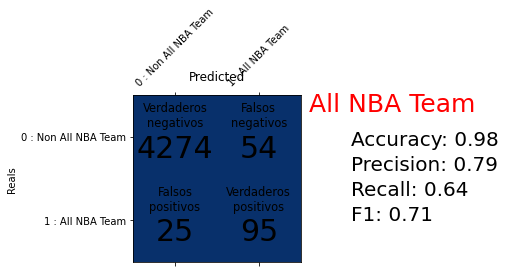

In [53]:
def metricas(y_1_test_copy, prediccion):
    """ Calcular las métricas utilizando sklearn """
    matriz = confusion_matrix(y_1_test_copy, prediccion)
    accuracy = accuracy_score(y_1_test_copy, prediccion)
    precision = precision_score(y_1_test_copy, prediccion)
    recall = recall_score(y_1_test_copy, prediccion)
    f1 = f1_score(y_1_test_copy, prediccion)
    return matriz, accuracy, precision, recall, f1

def visualiza_metricas(y_1_test_copy, prediccion, titulo):
    """ Visualiza la matriz de confusión y métricas """
    
    #Código para calcular las métricas y matriz de confusión
    
    matriz, accuracy, precision, recall, f1 = \
                    metricas(y_1_test_copy, prediccion)
    
    #Código de matplotlib para graficar 
    plt.figure(figsize=(3, 3))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : Non All NBA Team", "1 : All NBA Team"])
    plt.matshow(matriz, cmap="Blues", vmin=0, vmax=10, fignum=1)
    plt.title("Predicted")
    plt.ylabel("Reals")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f" % f1, fontsize=20)    
    plt.show()
    print("\n" * 5)

print("\n" * 5)

visualiza_metricas(y_1_test_copy, prediccion, "All NBA Team")


From now on, you'll be evaluating you model primarily using the F1 Score metric, but we also want to avoid models that have very low recall. 

### Classification

#### Feature engineering

2.8. One hot encode the Team feature. Make sure to drop the original column.

In [54]:
#Training Dataset
data_encode_team = pd.get_dummies(X_1_train["team"])
X_1_train = X_1_train.join(data_encode_team)
del X_1_train["team"]
#Testing Dataset
data_encode_team_0 = pd.get_dummies(X_1_test["team"])
X_1_test = X_1_test.join(data_encode_team_0)
del X_1_test["team"]

2.9. Train a logistic regresion model, find the best hyperparameters for: tols, C and max_iter. Try at least 4 values of each parameter. Remember to select based on f1 score, but report also precision and recall. Save the best performing model to use in the next steps.

In [55]:
def search_best_hyperparameters_classification(tol, C, max_iter):
  lr = LogisticRegression(tol=tol, C=C, max_iter=max_iter)
  lr.fit(X_1_train, y_1_train)
  y_2_pred = lr.predict(X_1_test)
  f1 = f1_score(y_1_test, y_2_pred, average="binary")
  warnings.filterwarnings('ignore')
  return f1

In [56]:
# Example list of hyperparameters values
tol = [0.000001, 0.00001, 0.0001, 0.001, 0.1]
C = [0.1, 0.5, 1.0, 1.5, 2.0]
max_iter = [100, 1000, 10000, 10000, 100000]
best_tol = 0
best_C = 0
best_max_iter = 0
best_result_1 = 0  #I choose 0 because is the worst possible result...

for i in range(len(tol)):
  for j in range(len(C)):
    for k in range(len(max_iter)):
      result = search_best_hyperparameters_classification(tol[i], C[j], max_iter[k])
      if result >= best_result_1:
        best_result_1 = result
        best_tol = tol[i]
        best_C = C[j]
        best_max_iter = max_iter[k]

print("The best result is of a f1 value of",best_result_1,"with tol =",best_tol,"C =",best_C,"and",best_max_iter,"number of iterations.")

lr = LogisticRegression(tol=best_tol, C=best_C, max_iter=best_max_iter)
lr.fit(X_1_train, y_1_train)
y_2_pred = lr.predict(X_1_test)
precision = precision_score(y_1_test, y_2_pred)
print("With a precision of",precision)
recall = recall_score(y_1_test, y_2_pred)
print("With a recall of",recall)

The best result is of a f1 value of 0.7418181818181819 with tol = 0.1 C = 2.0 and 100000 number of iterations.
With a precision of 0.8095238095238095
With a recall of 0.6845637583892618


#### Evaluating on New Data

You're now going to evaluate the results on a test dataset that has not being used to train or do hyperparameter tuning, this is sometimes known as a Test set (in this cases the test set used for training is known as validation set, yeah, it's confusing, but you can read about it [here](https://machinelearningmastery.com/difference-test-validation-datasets/))

2.10. Load the dataset [all_nba_2018_dataset.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv) in one dataframe and [all_nba_2018_selections.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv)) in another, then:

    - Scale the numerical features. Columns season_id, player_id, player_season, player, season and season_start will not be used for prediction, you can keep them but remember not to pass them to the classifier.
    
    - Create the one hot encoded features for team. This step will be complex, as you will have to consider that in the 2018 season there are 30 teams, but the previous dataset contains 40 teams, that is because a lot of teams changed names or cities over the years. You need to add those 10 different team names in this dataset (with all values in 0) to make the classifier work.

In [57]:
all_nba_2018_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv", index_col=0)
all_nba_2018_selections = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv", index_col=0)

In [58]:
all_nba_2018_df_copy = all_nba_2018_df.copy()

In [59]:
#Deleting
del all_nba_2018_df["season_id"]
del all_nba_2018_df["player_id"]
del all_nba_2018_df["player_season"]
del all_nba_2018_df["player"]
del all_nba_2018_df["season"]
del all_nba_2018_df["season_start"]

#Features Scaling
scaler = StandardScaler()
features_to_scale = ['games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc', '2p_perc','ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
all_nba_2018_df[features_to_scale] = scaler.fit_transform(all_nba_2018_df[features_to_scale])

In [60]:
#Encoding 
data_encode_team_1 = pd.get_dummies(all_nba_2018_df["team"])
all_nba_2018_df = all_nba_2018_df.join(data_encode_team_1)
del all_nba_2018_df["team"]

#Addition of missing teams
vacios = [0]*530
all_nba_2018_df["CHA"] = vacios
all_nba_2018_df["CHH"] = vacios
all_nba_2018_df["KCK"] = vacios
all_nba_2018_df["NJN"] = vacios
all_nba_2018_df["NOH"] = vacios
all_nba_2018_df["NOK"] = vacios
all_nba_2018_df["SDC"] = vacios
all_nba_2018_df["SEA"] = vacios
all_nba_2018_df["VAN"] = vacios
all_nba_2018_df["WSB"] = vacios

2.11. Predict and evaluate the model using precision, recall and f1 score. 

In [61]:
#Prediction on a new dataset of the model trained on point 2.9
prediccion = lr.predict(all_nba_2018_df)
precision = precision_score(all_nba_2018_selections["all_nba"], prediccion)
recall = recall_score(all_nba_2018_selections["all_nba"], prediccion)
f1 = f1_score(all_nba_2018_selections["all_nba"], prediccion)
print("The precicion is of",precision)
print("The recall is of",recall)
print("The f1 is of",f1)


The precicion is of 0.5652173913043478
The recall is of 0.8666666666666667
The f1 is of 0.6842105263157895


2.12. Analyze the results, what do you think it is happening?

In [ ]:
"""As we can see there was not much of a diffference on the metrics selected when we choose 
a new dataset (OBS: On point 2.9 we have tried with a lot of different options for the parameteres
selected and select the best result, so it is kind of tricky because here we have calculated with
default parameters..).Either way, being honest... I was not expecting a much better or worse result 
than the one obtained in point 2.9 because we are kind of doing the same thing but with a new dataset
only, the model is still the same one..."""

#### Creating our custom Classifier

One thing to consider in this problem, is that the number of ALl NBA selections is fixed each year, a total of 15 players are always selected. But our current model does not limit the number of positive classified players. So, we will have to wrap our model in a custom classifier that only returns as positive the 15 players with the higher probabilities. 
Fortunately, our chosen model provides access to the underlying probabilities.

2.13. Using the trained model, predict probabilities for all rows in the dataset, and create a new column that has the probability that the player was selected as all nba. Round the probability to 3 decimals.

In [63]:
probabilidades_prediccion = lr.predict_proba(all_nba_2018_df)
probabilidades_positivas = probabilidades_prediccion[:,1]
probabilidades_positivas = probabilidades_positivas.tolist()
for i in range(len(probabilidades_positivas)):
  probabilidades_positivas[i] = round(probabilidades_positivas[i],3)

all_nba_2018_df_copy["probability"] = probabilidades_positivas

2.14. Sort the dataset by probabilities and show the 15 players with higher probability to have been selected

In [74]:
all_nba_2018_df_copy = all_nba_2018_df_copy.sort_values(by="probability",ascending=False)
players_predicted_selected = all_nba_2018_df_copy.head(15)

In [75]:
players_predicted_selected

,season_id,player_id,player_season,player,season,season_start,team,games,gamesstarted,mp,...,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts,probability
5604,5604,1024,10,James Harden,2018-19,2018,HOU,78,78,36.8,...,0.528,0.879,6.6,7.5,2.0,0.7,5.0,3.1,36.1,1.000
453,452,83,6,Giannis Antetokounmpo,2018-19,2018,MIL,72,72,32.8,...,0.641,0.729,12.5,5.9,1.3,1.5,3.7,3.2,27.7,0.999
6857,6841,1240,16,LeBron James,2018-19,2018,LAL,55,55,35.2,...,0.582,0.665,8.5,8.3,1.3,0.6,3.6,1.7,27.4,0.998
3401,3273,587,7,Anthony Davis,2018-19,2018,NOP,56,56,33.0,...,0.547,0.794,12.0,3.9,1.6,2.4,2.0,2.4,25.9,0.998
4145,4145,740,3,Joel Embiid,2018-19,2018,PHI,64,64,33.7,...,0.535,0.804,13.6,3.7,0.7,1.9,3.5,3.3,27.5,0.985
14479,14479,2648,11,Russell Westbrook,2018-19,2018,OKC,73,73,36.0,...,0.481,0.656,11.1,10.7,1.9,0.5,4.5,3.4,22.9,0.932
14027,14027,2572,8,Nikola Vucevic,2018-19,2018,ORL,80,80,31.4,...,0.549,0.789,12.0,3.8,1.0,1.1,2.0,2.0,20.8,0.925
8103,8097,1492,8,Kawhi Leonard,2018-19,2018,TOR,60,60,34.0,...,0.542,0.854,7.3,3.3,1.8,0.4,2.0,1.5,26.6,0.901
3908,3908,695,12,Kevin Durant,2018-19,2018,GSW,78,78,34.6,...,0.587,0.885,6.4,5.9,0.7,1.1,2.9,2.0,26.0,0.871
7225,7225,1315,4,Nikola Jokic,2018-19,2018,DEN,80,80,31.3,...,0.569,0.821,10.8,7.3,1.4,0.7,3.1,2.9,20.1,0.848


2.15. Print:

    - Players actually selected from the all_nba_2018_selections dataset,
    - Players actually selected missing from OUR predictions+
    - Players in our predictions not selected 

In [65]:
#Players actually selected from the all_nba_2018_selections dataset
names_selected = []
for index, columns in all_nba_2018_selections.iterrows():
  if columns["all_nba"] == 1:
    names_selected.append(columns["player"])

print("List of player´s names actually selected:",names_selected)

#Players predicted from our models
names_predicted = []
for index, columns in players_predicted_selected.iterrows():
    names_predicted.append(columns["player"])

print("List of player´s names predicted:",names_predicted)

List of player´s names actually selected: ['Giannis Antetokounmpo', 'Stephen Curry', 'Kevin Durant', 'Joel Embiid', 'Paul George', 'Rudy Gobert', 'Blake Griffin', 'James Harden', 'Kyrie Irving', 'LeBron James', 'Nikola Jokic', 'Kawhi Leonard', 'Damian Lillard', 'Kemba Walker', 'Russell Westbrook']
List of player´s names predicted: ['James Harden', 'Giannis Antetokounmpo', 'LeBron James', 'Anthony Davis', 'Joel Embiid', 'Russell Westbrook', 'Nikola Vucevic', 'Kawhi Leonard', 'Kevin Durant', 'Nikola Jokic', 'Kemba Walker', 'Karl-Anthony Towns', 'Rudy Gobert', 'LaMarcus Aldridge', 'Jrue Holiday']


In [66]:
A = set(names_selected)
B = set(names_predicted)
C = A.intersection(B) #Selected and Predicted

#Players actually selected from the all_nba_2018_selections dataset
print("List of player´s names actually selected:",names_selected)

#Players actually selected missing from OUR predictions
D = A - C
print("List of player´s name missing from our predictions:",D)

#Players in our predictions not selected 
E = B - C
print("List of player´s names predicted who had not been selected:",E)

List of player´s names actually selected: ['Giannis Antetokounmpo', 'Stephen Curry', 'Kevin Durant', 'Joel Embiid', 'Paul George', 'Rudy Gobert', 'Blake Griffin', 'James Harden', 'Kyrie Irving', 'LeBron James', 'Nikola Jokic', 'Kawhi Leonard', 'Damian Lillard', 'Kemba Walker', 'Russell Westbrook']
List of player´s name missing from our predictions: {'Stephen Curry', 'Paul George', 'Damian Lillard', 'Kyrie Irving', 'Blake Griffin'}
List of player´s names predicted who had not been selected: {'Jrue Holiday', 'Anthony Davis', 'Karl-Anthony Towns', 'Nikola Vucevic', 'LaMarcus Aldridge'}


2.16. Create a class named AllNbaSingleSeasonClassifier that takes a scikit learn model in the constructor, then implements a predict method that returns predictions with only the 15 most probable selections.

In [67]:
class AllNbaSingleSeasonClassifier():
    def __init__(self, model):
        self._model = model
        
    def predict(self, X):
      probabilidades_prediccion = lr.predict_proba(X)
      probabilidades_positivas = probabilidades_prediccion[:,1]
      probabilidades_positivas = probabilidades_positivas.tolist()
      for i in range(len(probabilidades_positivas)):
        probabilidades_positivas[i] = round(probabilidades_positivas[i],3)

      X["probability"] = probabilidades_positivas
      X_copy = X.sort_values(by = "probability", ascending=False)
      indices_top15 = X_copy.iloc[:15].index
      X["selected"] = 0
      X.loc[indices_top15, ["selected"]] = 1

      return X["selected"].values        

In [68]:
test = AllNbaSingleSeasonClassifier(lr)
pre = test.predict(all_nba_2018_df)
print(pre)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 

2.17. Use the new classifier to make predictions and evaluate the result with precision, recall and f1

In [73]:
precision_1 = precision_score(all_nba_2018_selections["all_nba"], pre)
recall_1 = recall_score(all_nba_2018_selections["all_nba"], pre)
f1_1 = f1_score(all_nba_2018_selections["all_nba"], pre)
print("The precicion is of",precision_1)
print("The recall is of",recall_1)
print("The f1 is of",f1_1)

The precicion is of 0.6666666666666666
The recall is of 0.6666666666666666
The f1 is of 0.6666666666666666


#### Analyzing our results

2.18. What do you think it is the main problem with this dataset and the way we trained our model?

In [ ]:
""" I believe that the main problem with the dataset is that it does not consider any "intangible" features,
I know that these ones are hard to "calculate" or putting into numbers, but clearly there are a lot of these 
factors which influence as much as the players´s statistics, such as: How well his team perform, how much his 
performances influence on the level of his team, in which instances of the tournament and against which teams
have the player performed well, and also the hierarchy of each player (for example, our model did not predict
that Curry should be on the All NBA Team but he had been selected that year, maybe he have done a similar 
season on terms of statistical manners with another non-famous player but the must probably thing they would
do is to select Curry because it is "easier"), just to give some examples....
Then, about the main problem of how we trained the model..., I should be honest and do not talk about things I 
don´t know..., if it weren´t for this question I would not have thought that there was a problem at the 
time of training the model so I don´t have any opinion about this but ,as I said before, that it didn´t seem 
to me that there was a major problem of how we did it."""

2.19. What do you think we could do to improve our model?

In [ ]:
"""Well, as I said on the previous point, adding more intanguibles features, maybe collecting more data to 
train it and also, it was shown on this project with some examples, the importance of selecting the 
correct model, by this I mean the one which performs better, so I believe that spending a good amount
of time on trying to select the most accurate model could improve radically the final result. In addition
to this topic, it have been proved the relevance of iterating the model with different combination of 
hyperparameters. """